# Lab 3: System Characterisation and Transfer Function
## Objectives:
- [x] Obtain the input-output relationship of a system at zero frequency (DC).
- [x] Obtain the frequency response of a system at different frequencies.
- [x] Obtain the step response of a system.
- [x] Understand the meaning of transfer function of a system in the s-domain.
- [x] Use Matlab to predict frequency response of a system from its transfer function through simulation only.
- [x] Compare the measured and the theoretic behaviour of a system.
- [x] Understand the transient behaviour of a system.

## Task 1: DC Characteristic of the Bulb Board

In [4]:
clear all;
ports = serialportlist;
pb = PyBench(ports(end));
pb.dc(1.5);
pause(1);
pb.get_one()


ans =

    2.1302




Bulb is semi-brightly lit and recorded intensity is 2.1302V

In [5]:
pb.dc(0);
pause(2);
pb.get_one()


ans =

    0.0024




First reading is not zero (21.7..) probably due to the ambient light. The difference in the reading is about 2.5V. On a second try, by connecting the bulb board to the PybOard using F-M Dupont wires and cupping the board with my hands to block out the ambient light, a reading of 0.0024 was obtained.

Various values of x_dc between 0 and 1.5 were tested and the minimum voltage required for the bulb to light up, is 0.45V

The bulb will glow no brighter than 1.6V input voltage, x_dcH = 1.6V

The following script performs the DC characterisation of the bulb board automatically. We are interested in the **steady state** response of the system hence a delay of 0.5 seconds is added following a change in x_dc.

Sweeping DC output for DC transfer function
Elapsed time is 30.529190 seconds.



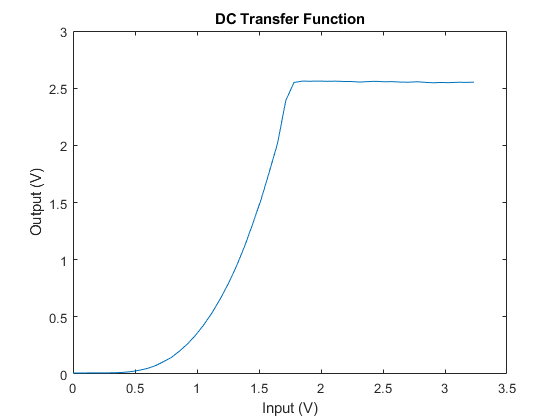

In [23]:
clear all
ports = serialportlist;
pb = PyBench(ports(end));

pb.samp_freq = 200;
NSTEPS=50;
input = zeros(NSTEPS,1);
output = zeros(NSTEPS,1);

tic % start stopwatch timer
disp('Sweeping DC output for DC transfer function');
for i = [1:NSTEPS]
    v = (i-1)*3.3/NSTEPS;
    input(i) = v;
    pb.dc(v);
    pause(0.5);
    data = pb.get_block(10);
    output(i) = mean(data);
end
pb.dc(0.0);

toc % stop stopwatch timer

plot(input,output)
xlabel('Input (V)');
ylabel('Output (V)');
title('DC Transfer Function');
fclose(instrfind());

#### What is a transfer function?
A transfer function represents the relationship between the output signal of a control system and the input signal, for all possible input values.
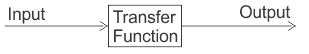

#### Steady-state vs. transient response of a system
The transient response of a system occurs either just after the system has been switched on or after an abnormality has occured e.g. sudden change in the load, short circuiting etc.

The steady state response of a system occurs after the system becomes settled and at the steady system starts working normally

#### Why is the above system non-linear?
It does not follow the principle of homogeneity and additivity. 

If the system were linear it would be a straight line graph instead of an exponential-like curve.

This system is approximately linear between the input voltages of 1.45-1.55V, based on visual inspection of the graph

## Task 2: Frequency Response of the Bulb Board System

The following code calculates and plots the **theoretical** frequency response of the Bulb Box System.The system is modelled mathematically as a linear system as two things connected in series, that is the second order electronic circuit and the light bulb, detector/amplifier as a first order system. The overall system is modelled in the Laplace-s doain as: 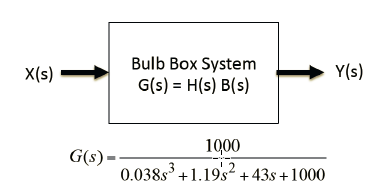

We want to find the system's gain G for sinusoidal signals x(t) at different signal frequencies i.e. the frequency response of the system. To d this we evaluate s = jw.

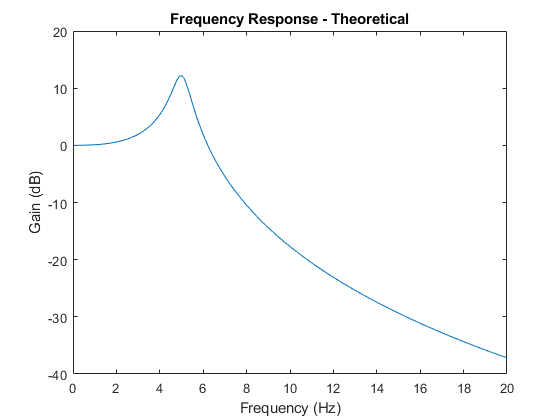

In [27]:
f = (0:0.1:20);
D = [0.038 1.19 43 1000];   % specify denominator
s = 1i*2*pi*f;               % s = jw (1i is sqrt(-1))
G = 1000./abs(polyval(D,s));  % polynomial evaluation 
Gdb = 20*log10(G);          % Gain in dB
figure;
plot(f,Gdb);
xlabel('Frequency (Hz)');
ylabel('Gain (dB)');
title('Frequency Response - Theoretical');

5Hz is the resonant frequency of the system

polyval syntax is used as follows
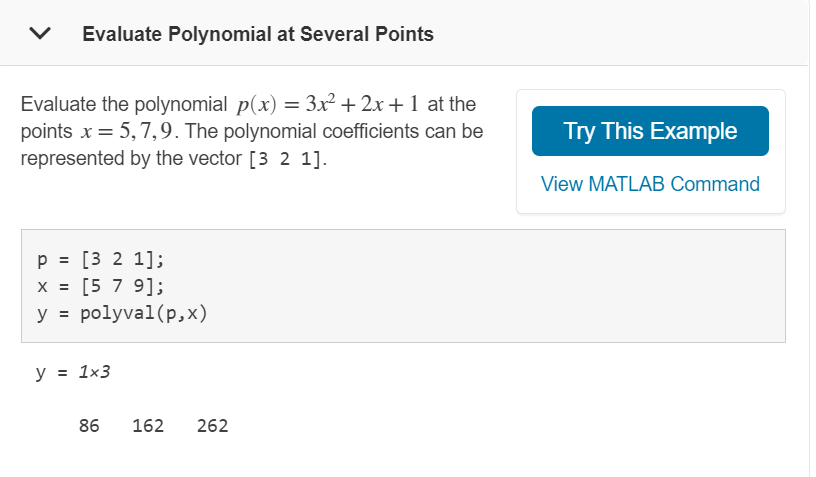

G(s) |s=jw at frequencies 0 Hz, 5 Hz and 20 Hz were evaluated as shown below. As expected, these agree with the prediction

In [28]:
D = [0.038 1.19 43 1000];
f = [0,5,20];
s = 1i*2*pi*f;
G = 1000./abs(polyval(D,s));
G_db = 20*log10(G);
display(G_db)


G_db =

         0   12.2004  -37.1743




## Task 3: Measure the frequency response of the Bulb Board system using Pybench

The following script measures the **actual frequency response** from the Bulb Board and displays the gain at a frequency of 5 Hz. The output voltage of the bulb board is plotted.


G =

   13.4224


G_dB =

   22.5566




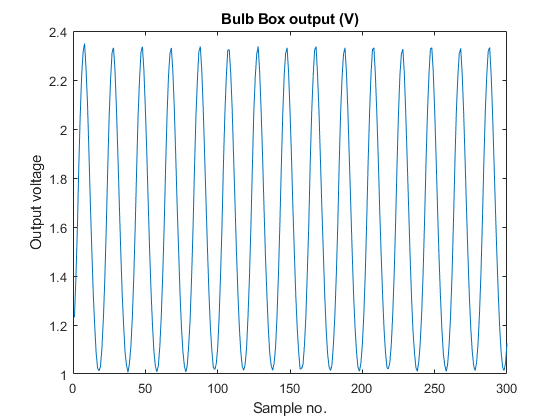

In [25]:
% Measure system gain at frequency f_sig
%
clear all
ports = serialportlist;
pb = PyBench(ports(end));  % create a PyBench object
% Generate a sine wave at sig_freq Hz
max_x = 1.55;
min_x = 1.45;
f_sig = 5.0;
pb=pb.set_sig_freq(f_sig);
pb=pb.set_max_v(max_x);
pb=pb.set_min_v(min_x);
pb.sine();
pause(2)
% Capture output y(t)
pb=pb.set_samp_freq(100);  % sample at 100Hz
N = 300;     % no of samples to capture
y = pb.get_block(N);
% plot signal
plot(y); 
xlabel('Sample no.');
ylabel('Output voltage'); 
title('Bulb Box output (V)');
% Compute Gain
x_pk2pk = max_x - min_x;
y_pk2pk = max(y) - min(y);
G = y_pk2pk/x_pk2pk
G_dB = 20*log10(y_pk2pk/x_pk2pk)

The actual gain measured from the board is 22.6dB while the theoretical gain at 5Hz is 12.1dB.

This difference is caused by the DC gain which is the gradient of the theoretical frequency response of the system calculated between 1.45 and 1.55V 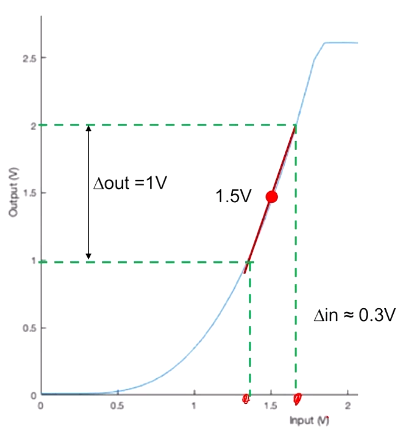

The DC gain is found to be approximately 10V which is exactly how much the theoretical and measured frequency responses differ.

The following script measures and plots the actual frequency response of the bulb board automatically.


f =

     1


f =

     2


f =

     3


f =

     4


f =

     5


f =

     6


f =

     7


f =

     8


f =

     9


f =

    10


f =

    11


f =

    12


f =

    13


f =

    14


f =

    15


f =

    16


f =

    17


f =

    18


f =

    19

Elapsed time is 95.320365 seconds.



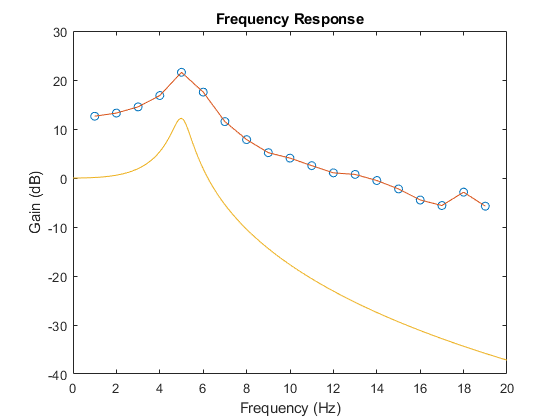

In [32]:
clear all
ports = serialportlist;
pb = PyBench(ports(end));  % create a PyBench object
pb=pb.set_samp_freq(100);
MIN_F = 1;
MAX_F = 20;
NSTEPS = 19;
fstep = (MAX_F - MIN_F)/NSTEPS;
x_max = 1.55;
x_min = 1.45;
pb=pb.set_max_v(x_max);
pb=pb.set_min_v(x_min);
tic
for i = [1:NSTEPS]
    f = (i-1)*fstep + MIN_F
    x(i) = f;
    pb = pb.set_sig_freq(f);
    pb.sine();
    pause(2.0)
    data = pb.get_block(200);
    y(i) = 20*log10((max(data)-min(data))/(x_max-x_min));
end
toc
plot(x,y,'o')
hold on
plot(x,y)
xlabel('Frequency (Hz)');
ylabel('Gain (dB)');
title('Frequency Response');

% plot theoretic response
f=(0:0.1:20);
D = [0.038 1.19 43 1000];  % specify denominator
s= 1i*2*pi*f;
G = 1000./abs(polyval(D,s));
Gdb = 20*log10(G);
hold on
plot(f,Gdb);

The measured frequency response is offset from the theoretical frequency response by a value of about 10V, equal to the gradient of the DC Gain. 
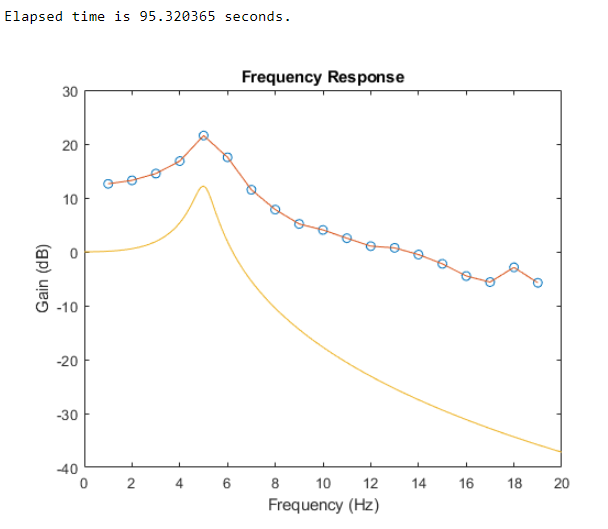

## Task 4: Measure the Step Response of the Bulb Board

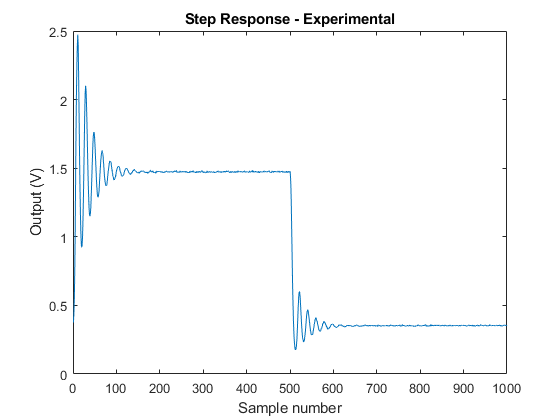

In [26]:
% Lab 3 Task 4 - Transient behaviour of Bulb Box
clear all
clf
ports = serialportlist;
pb = PyBench(ports(end));  % create a PyBench object
% set various parameters
fs = 100;
pb = pb.set_samp_freq(fs);
x_min = 1.0;
x_max = 1.5;
N = 500;   % no of data samples
% Capture step response
pb.dc(x_min);               % initial bulb value
pause(1);                   % wait 1 sec for it to settle
pb.dc(x_max)                % rising step to bulb
rise = pb.get_block(N);     % capture N samples
pb.dc(x_min)                % falling step to bulb
fall = pb.get_block(N);     % capture another N samples
data = [rise' fall'];       % combine rise with fall
% plotting    
clf
plot(data)
xlabel('Sample number');
ylabel('Output (V)');
title('Step Response - Experimental');


The amplitude of the rising step is significantly bigger than the falling step because it is proportional to the gradient of the DC Transfer Function at the "destination voltage"
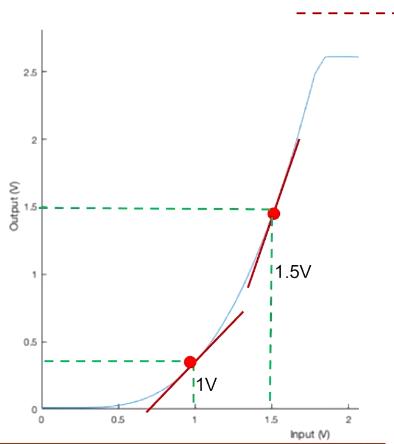

The period of the oscillating signal is 0.2s hence the frequency is 5Hz, the resonant frequency of the system. The damping ratio is 0.079.